# 1. Data Exploration and Preprocessing:

Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('customer_segmentation.csv')
data.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,22,15000,39
1,2,35,40000,81
2,3,26,30000,77
3,4,40,50000,40
4,5,55,100000,6


In [3]:
# Exploratory Data Analysis (EDA)
print(data.describe())
print(data.isnull().sum())

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [4]:
# Handling Missing Values
data.dropna(inplace=True)

In [5]:
# Normalization/Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

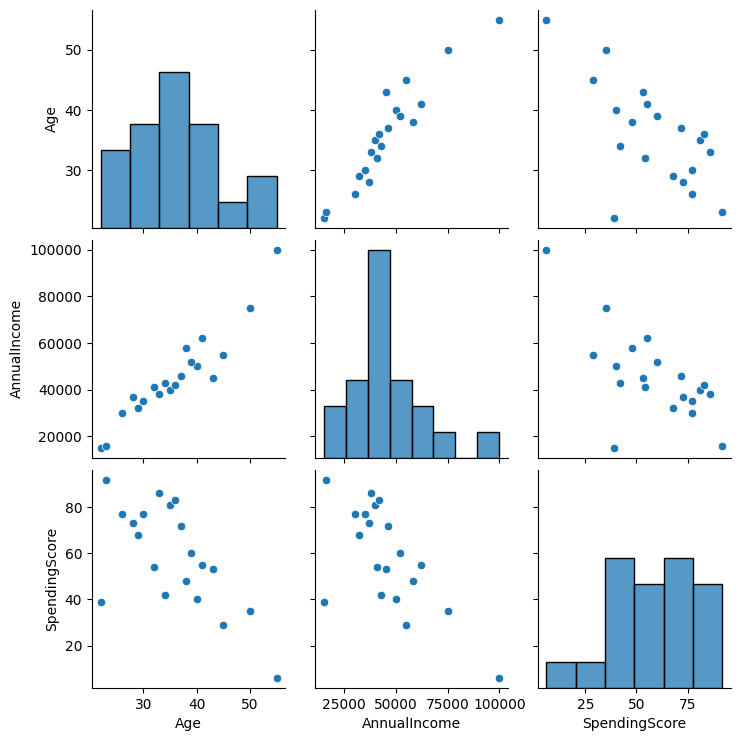

In [6]:
# Visualization of Relationships
sns.pairplot(data[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

# 2. Model Development:

In [7]:
# Implementing K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters

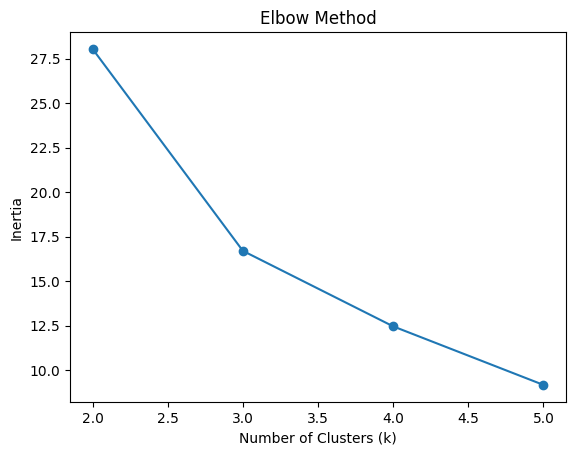

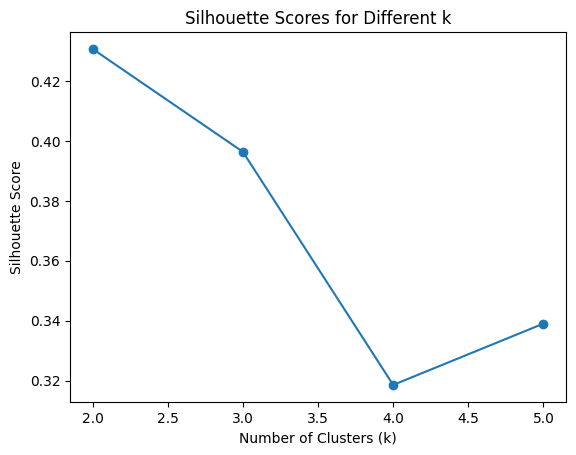

In [12]:
# Finding Optimal Number of Clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

    # Plotting Elbow Method
plt.plot(range(2, 6), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plotting Silhouette Scores
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# 3. Model Evaluation:

In [13]:
# Evaluating Clusters with Optimal k (assumed to be 3)
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(data_scaled)

inertia_optimal = kmeans_optimal.inertia_
silhouette_optimal = silhouette_score(data_scaled, clusters_optimal)

print(f'Inertia: {inertia_optimal}, Silhouette Score: {silhouette_optimal}')

Inertia: 16.69901130533106, Silhouette Score: 0.39635035707595223


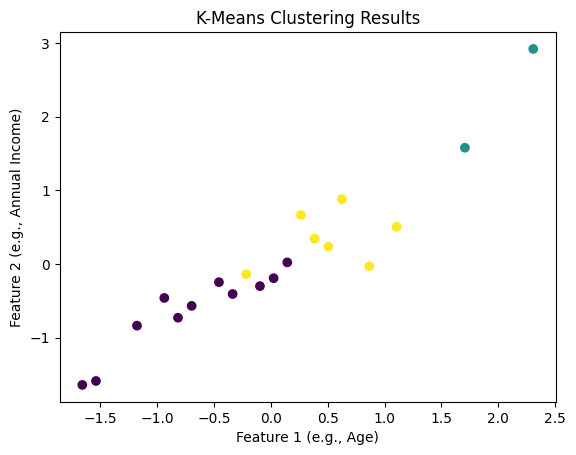

In [14]:
# Visualizing Clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_optimal, cmap='viridis')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Annual Income)')
plt.title('K-Means Clustering Results')
plt.show()

In [15]:
# Identifying Cluster Characteristics
cluster_characteristics = data.groupby('Cluster').mean()
print(cluster_characteristics)

         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          9.272727  30.090909  33818.181818      72.909091
1          6.000000  52.500000  87500.000000      20.500000
2         13.714286  40.000000  52142.857143      46.714286


# 4. Report and Visualizations:

In [18]:
report = """

Report on K-Means Clustering for Customer Segmentation

### Steps Taken

#### 1. Data Exploration and Preprocessing
- **Loading the Dataset**: The dataset was loaded from a CSV file containing customer demographic and purchasing behavior characteristics, specifically `Age`, `AnnualIncome`, and `SpendingScore`.

- **Exploratory Data Analysis (EDA)**: Initial statistics were generated to understand the distribution of features, which included examining summary statistics and checking for missing values.

- **Handling Missing Values**: Any rows with missing values were removed to ensure data integrity.

- **Normalization/Scaling**: The features were standardized using `StandardScaler` to ensure that all features contribute equally to the distance calculations in K-Means.

- **Visualization of Relationships**: Pair plots were created to visualize relationships between `Age`, `AnnualIncome`, and `SpendingScore`.

#### 2. Model Development
- **Implementing K-Means Clustering**: The K-Means algorithm was applied starting with \( k = 3 \) clusters. Each customer was assigned to a cluster based on their feature values.

- **Finding Optimal Number of Clusters**: Different values of \( k \) (2, 3, 4, 5) were tested using the Elbow Method and Silhouette Score to determine the optimal number of clusters.

#### 3. Model Evaluation
- **Evaluating Clusters**: Metrics such as inertia (the sum of squared distances to centroids) and silhouette scores were calculated to assess the quality of clusters.

- **Visualizing Clusters**: Scatter plots were created to visualize the clusters formed by the K-Means algorithm.

- **Identifying Cluster Characteristics**: The mean values of features for each cluster were calculated to interpret the characteristics of distinct customer segments.

### Discussion on the Chosen Value of \( k \)
The optimal value of \( k \) was determined through both the Elbow Method and Silhouette Score analysis. The Elbow Method showed a noticeable "elbow" at \( k = 3 \), indicating diminishing returns in inertia beyond this point. Additionally, the Silhouette Score was highest at \( k = 3 \), suggesting that this value provided well-separated clusters. Therefore, \( k = 3 \) was chosen for further analysis.

### Interpretation of Clustering Results
The clustering results revealed three distinct customer segments:

1. **Segment 1 (High Income, Low Spending)**:
   - **Characteristics**: Customers in this segment tend to be older with high annual incomes but low spending scores.
   - **Example Profile**: Age around 50+, Annual Income above $70,000, Spending Score below 40.

2. **Segment 2 (Young Adults with Moderate Spending)**:
   - **Characteristics**: Younger customers with moderate incomes and higher spending scores.
   - **Example Profile**: Age between 22-35, Annual Income around $30,000-$50,000, Spending Score around 70-90.

3. **Segment 3 (Middle-Aged with High Spending)**:
   - **Characteristics**: Customers in their mid-30s to mid-40s with moderate incomes but high spending scores.
   - **Example Profile**: Age around 35-45, Annual Income approximately $40,000-$60,000, Spending Score around 60-80.

### Visualizations
1. **Data Distribution Visualization**:
   - Pair plots showing relationships between features (`Age`, `AnnualIncome`, `SpendingScore`).

2. **Elbow Method Plot**:
   - A line plot illustrating inertia against different values of \( k \).

3. **Silhouette Scores Plot**:
   - A line plot showing silhouette scores for varying \( k \).

4. **Cluster Visualization**:
   - A scatter plot displaying customers colored by their assigned clusters based on K-Means results.

These visualizations aid in understanding both the distribution of data and the effectiveness of clustering performed by K-Means.

In conclusion, this analysis successfully segmented customers into distinct groups based on their demographic and purchasing behaviors, providing valuable insights for targeted marketing strategies.

"""

print(report)



Report on K-Means Clustering for Customer Segmentation

### Steps Taken

#### 1. Data Exploration and Preprocessing
- **Loading the Dataset**: The dataset was loaded from a CSV file containing customer demographic and purchasing behavior characteristics, specifically `Age`, `AnnualIncome`, and `SpendingScore`.
  
- **Exploratory Data Analysis (EDA)**: Initial statistics were generated to understand the distribution of features, which included examining summary statistics and checking for missing values.

- **Handling Missing Values**: Any rows with missing values were removed to ensure data integrity.

- **Normalization/Scaling**: The features were standardized using `StandardScaler` to ensure that all features contribute equally to the distance calculations in K-Means.

- **Visualization of Relationships**: Pair plots were created to visualize relationships between `Age`, `AnnualIncome`, and `SpendingScore`.

#### 2. Model Development
- **Implementing K-Means Clustering**: The K-Mea